# Projet 4 - Segmentez des clients d'un site e-commerce

## Analyse exploratoire et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.

In [37]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [38]:
# Importation du jeu de données
df = pd.read_csv('data/customer_segments3_202402161030.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95420 entries, 0 to 95419
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_unique_id      95420 non-null  object 
 1   total_orders            95420 non-null  int64  
 2   avg_delivery_time_days  93356 non-null  float64
 3   last_order_date         95420 non-null  object 
 4   days_since_last_order   95420 non-null  float64
 5   total_spent             95420 non-null  float64
 6   avg_review_score        94721 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.1+ MB


Le jeu initial de données contient 3376 observations réparties en 46 colonnes/variables.

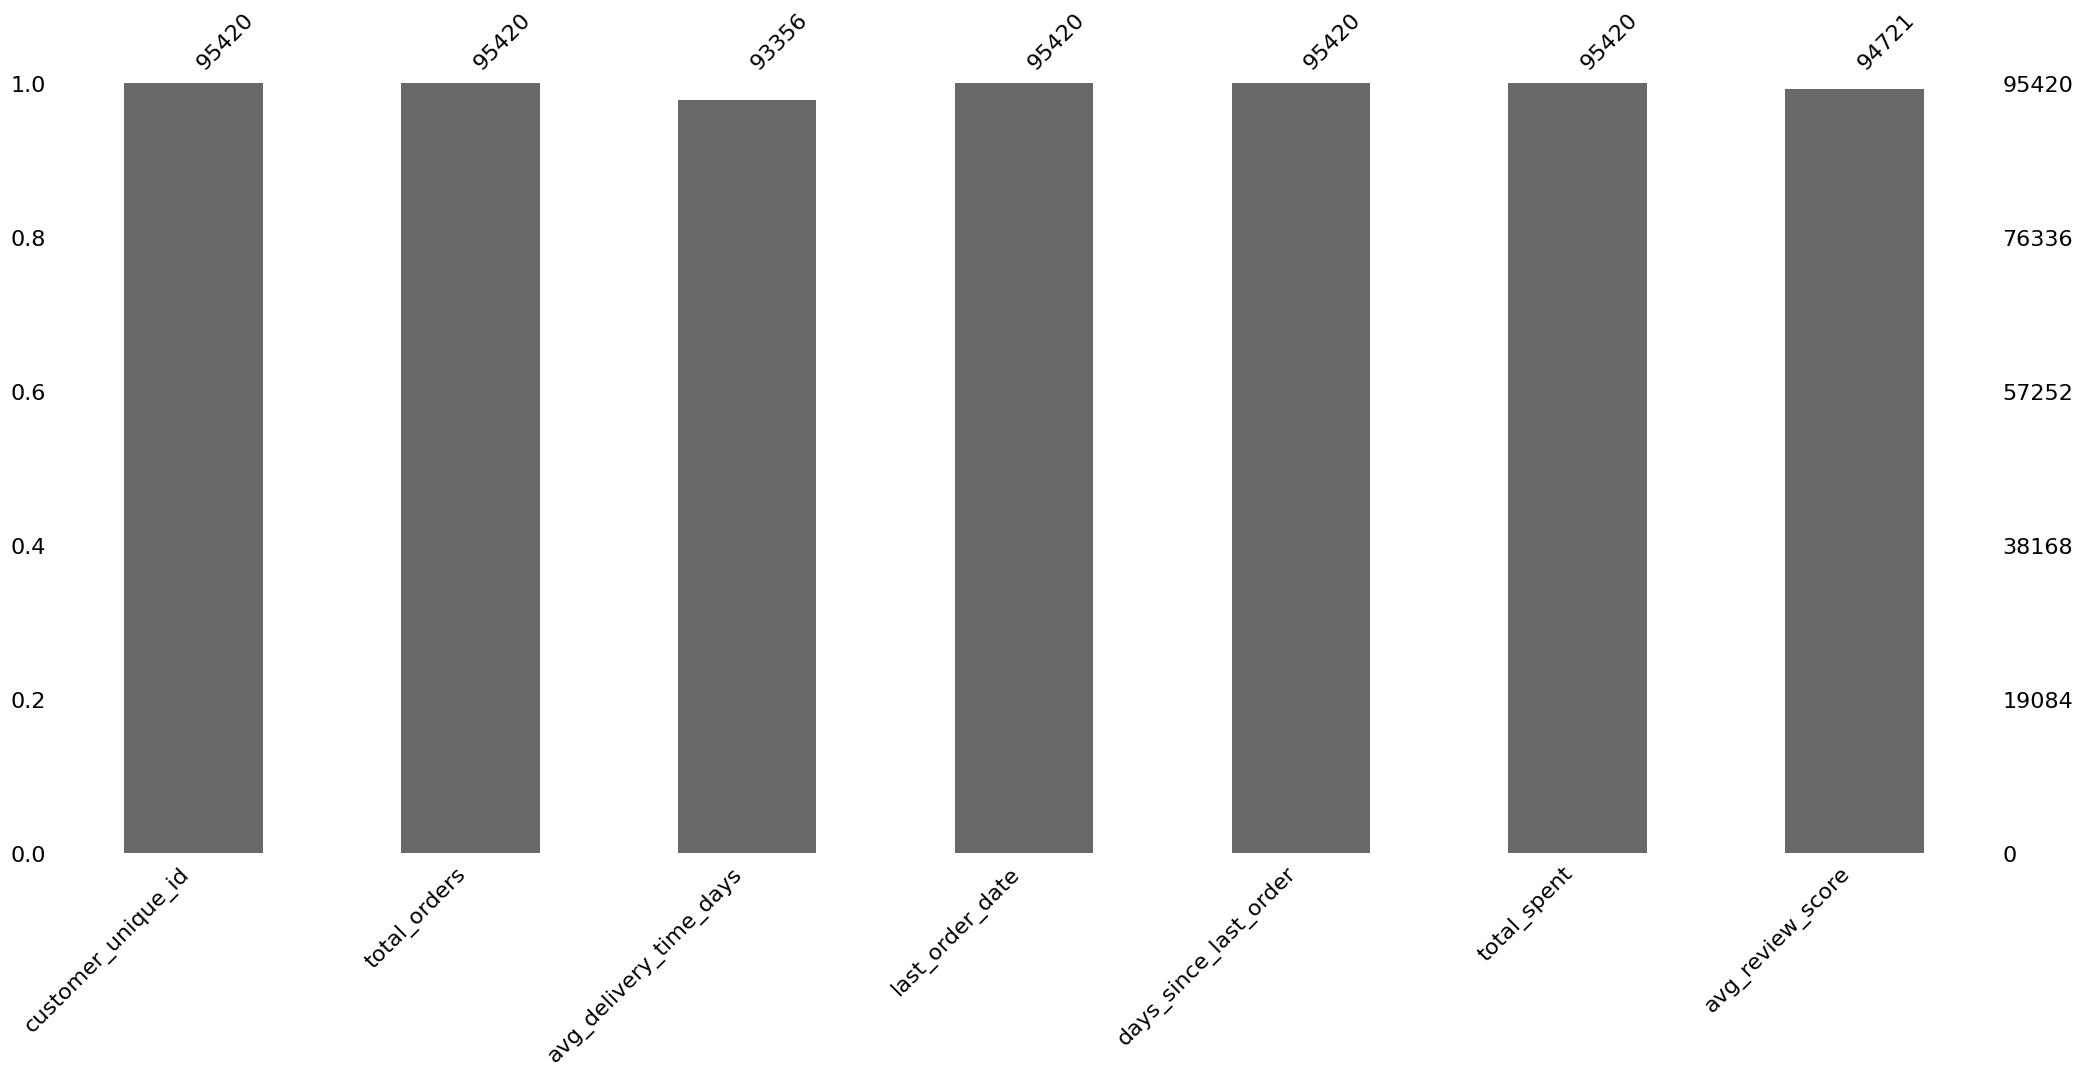

In [40]:
DataAnalysis.show_columns_population(df, type='bar')

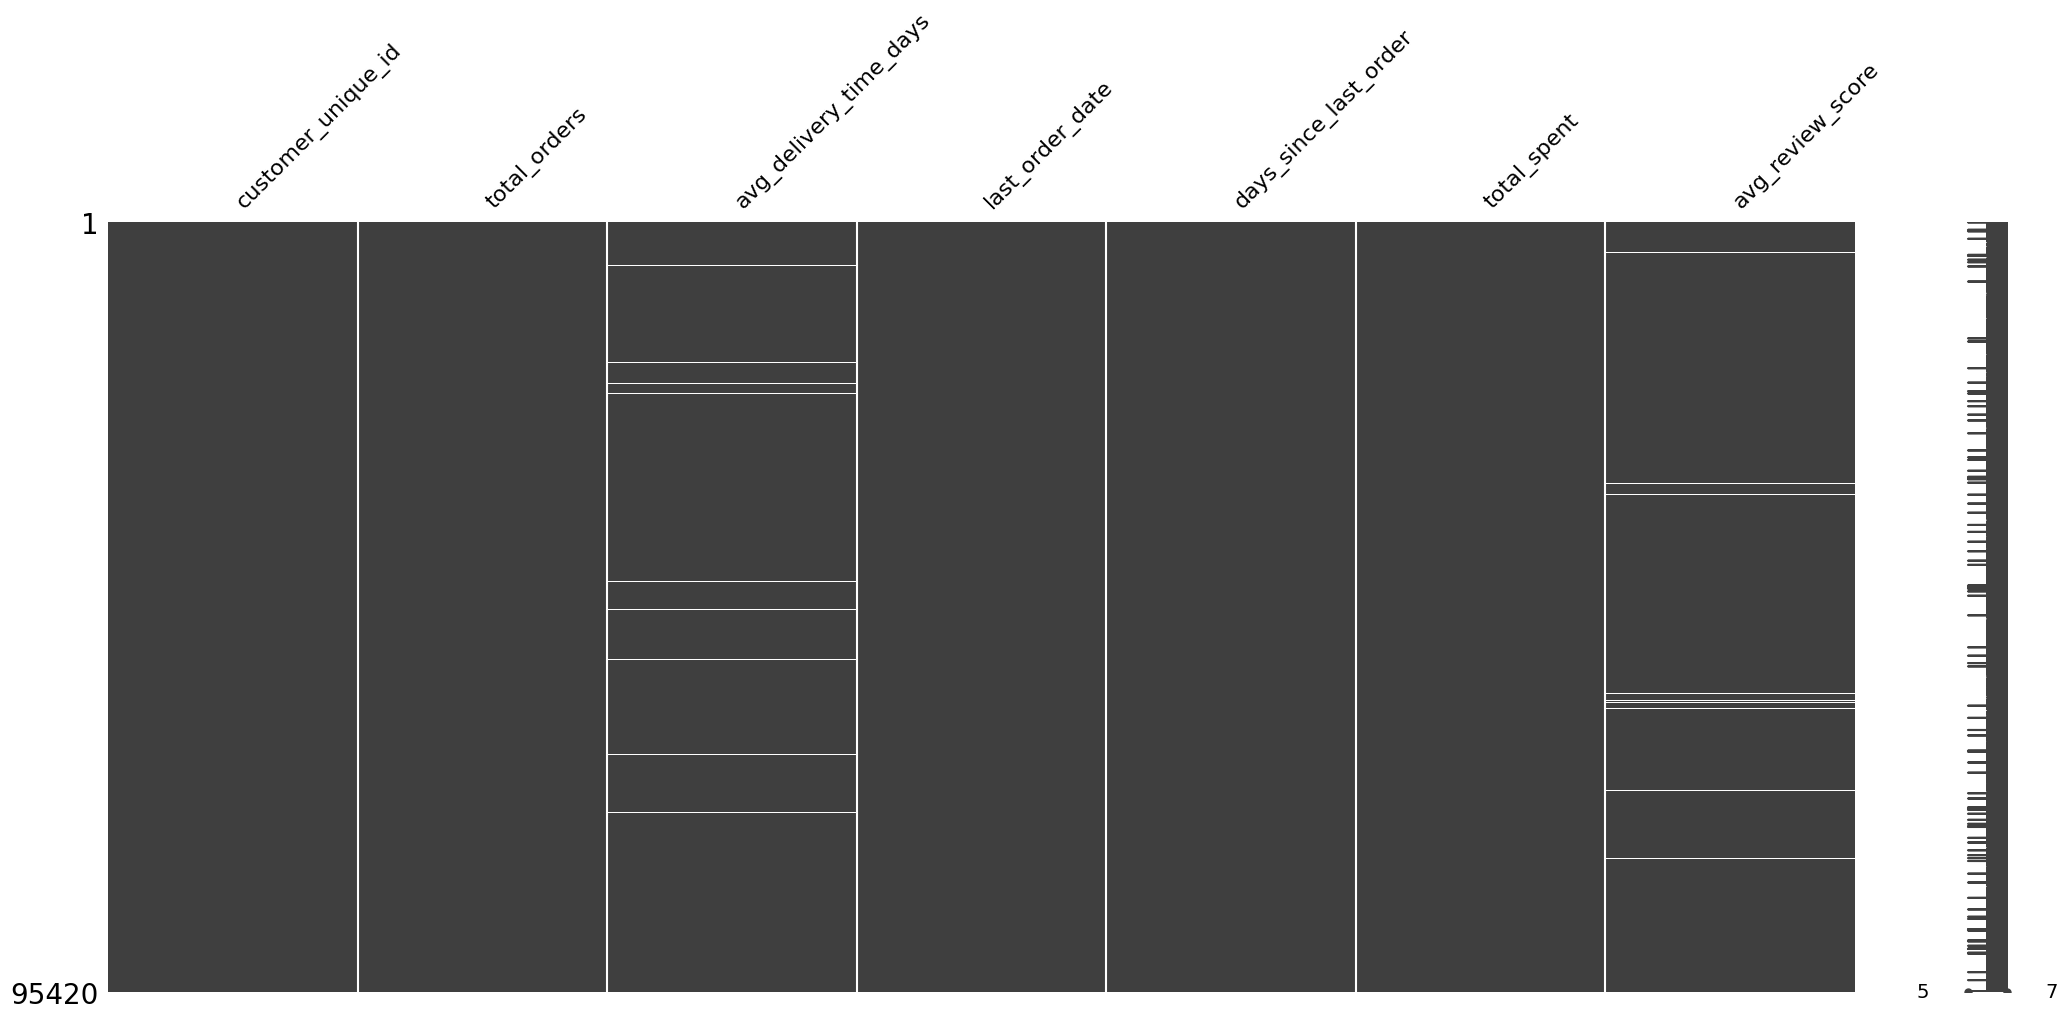

In [41]:
DataAnalysis.show_columns_population(df, type='matrix')

In [42]:
# On supprime la colonne "last_order_date" car elle ne nous sera pas utile, nous avons déjà la colonne "days_since_last_order"
df = df.drop(columns=['last_order_date'])



In [43]:
# on supprime les observations avec des valeurs manquantes
df = df.dropna()

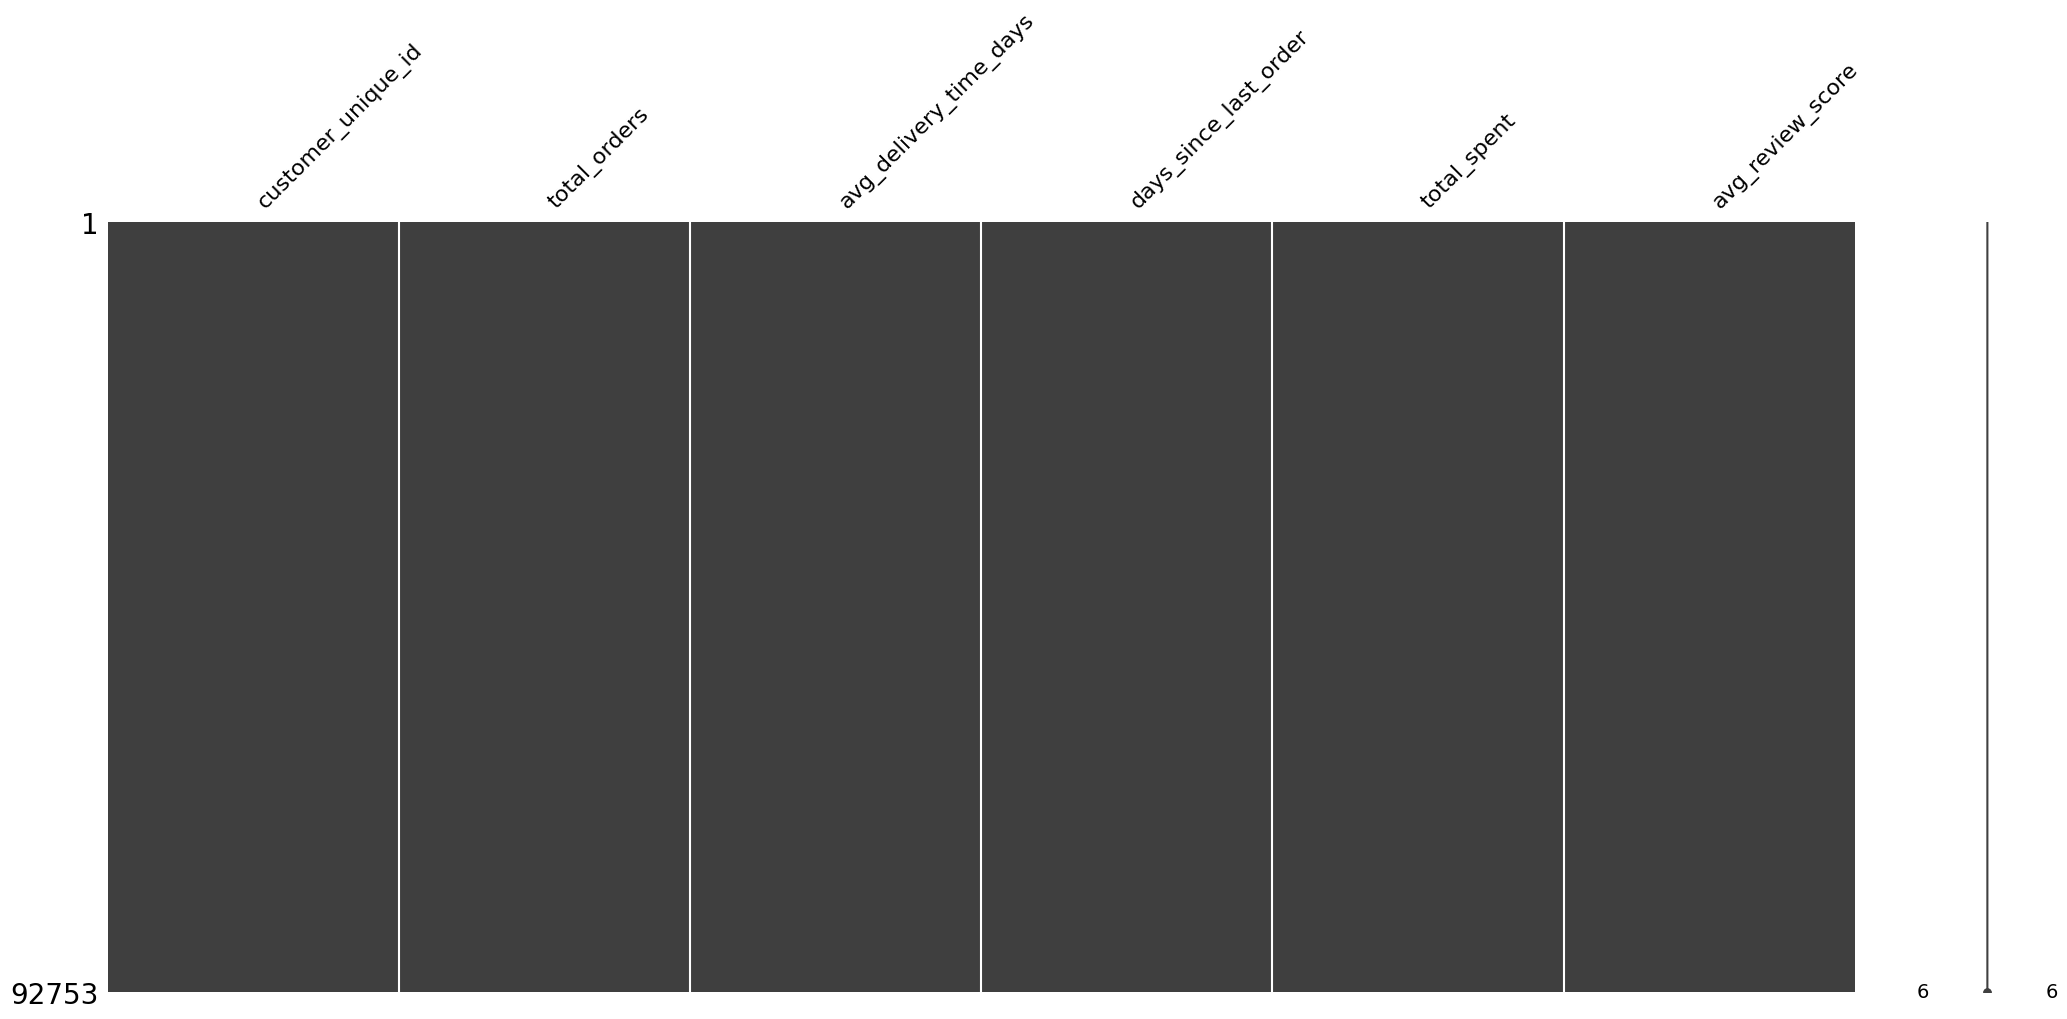

In [44]:
DataAnalysis.show_columns_population(df, type='matrix')

## Nous avons 92753 observations utilisables correspondant chacun à un client unique et leurs habitudes d'achat.

In [45]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score
count,92753.000000,92753.000000,92753.000000,92753.000000,92753.000000
mean,1.034824,12.526758,286.448219,165.902523,4.152347
std,0.213795,9.462082,152.623077,227.177670,1.280811
min,1.000000,0.533414,49.145613,9.590000,1.000000
25%,1.000000,6.779178,162.922766,63.100000,4.000000
50%,1.000000,10.220417,267.286389,107.900000,5.000000
75%,1.000000,15.666157,394.850752,183.160000,5.000000
max,16.000000,208.351759,762.259491,13664.080000,5.000000


### L'analyse des valeurs numériques permet d'observer qu'il ne semble pas y avoir de valeur aberrante. Les données semblent cohérentes.

In [46]:
# On liste les colonnes qui ont des valeurs de type number
df.select_dtypes(include=['number']).columns

Index(['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score'],
      dtype='object')

## Analyse des colonnes de type number et valeurs aberrantes

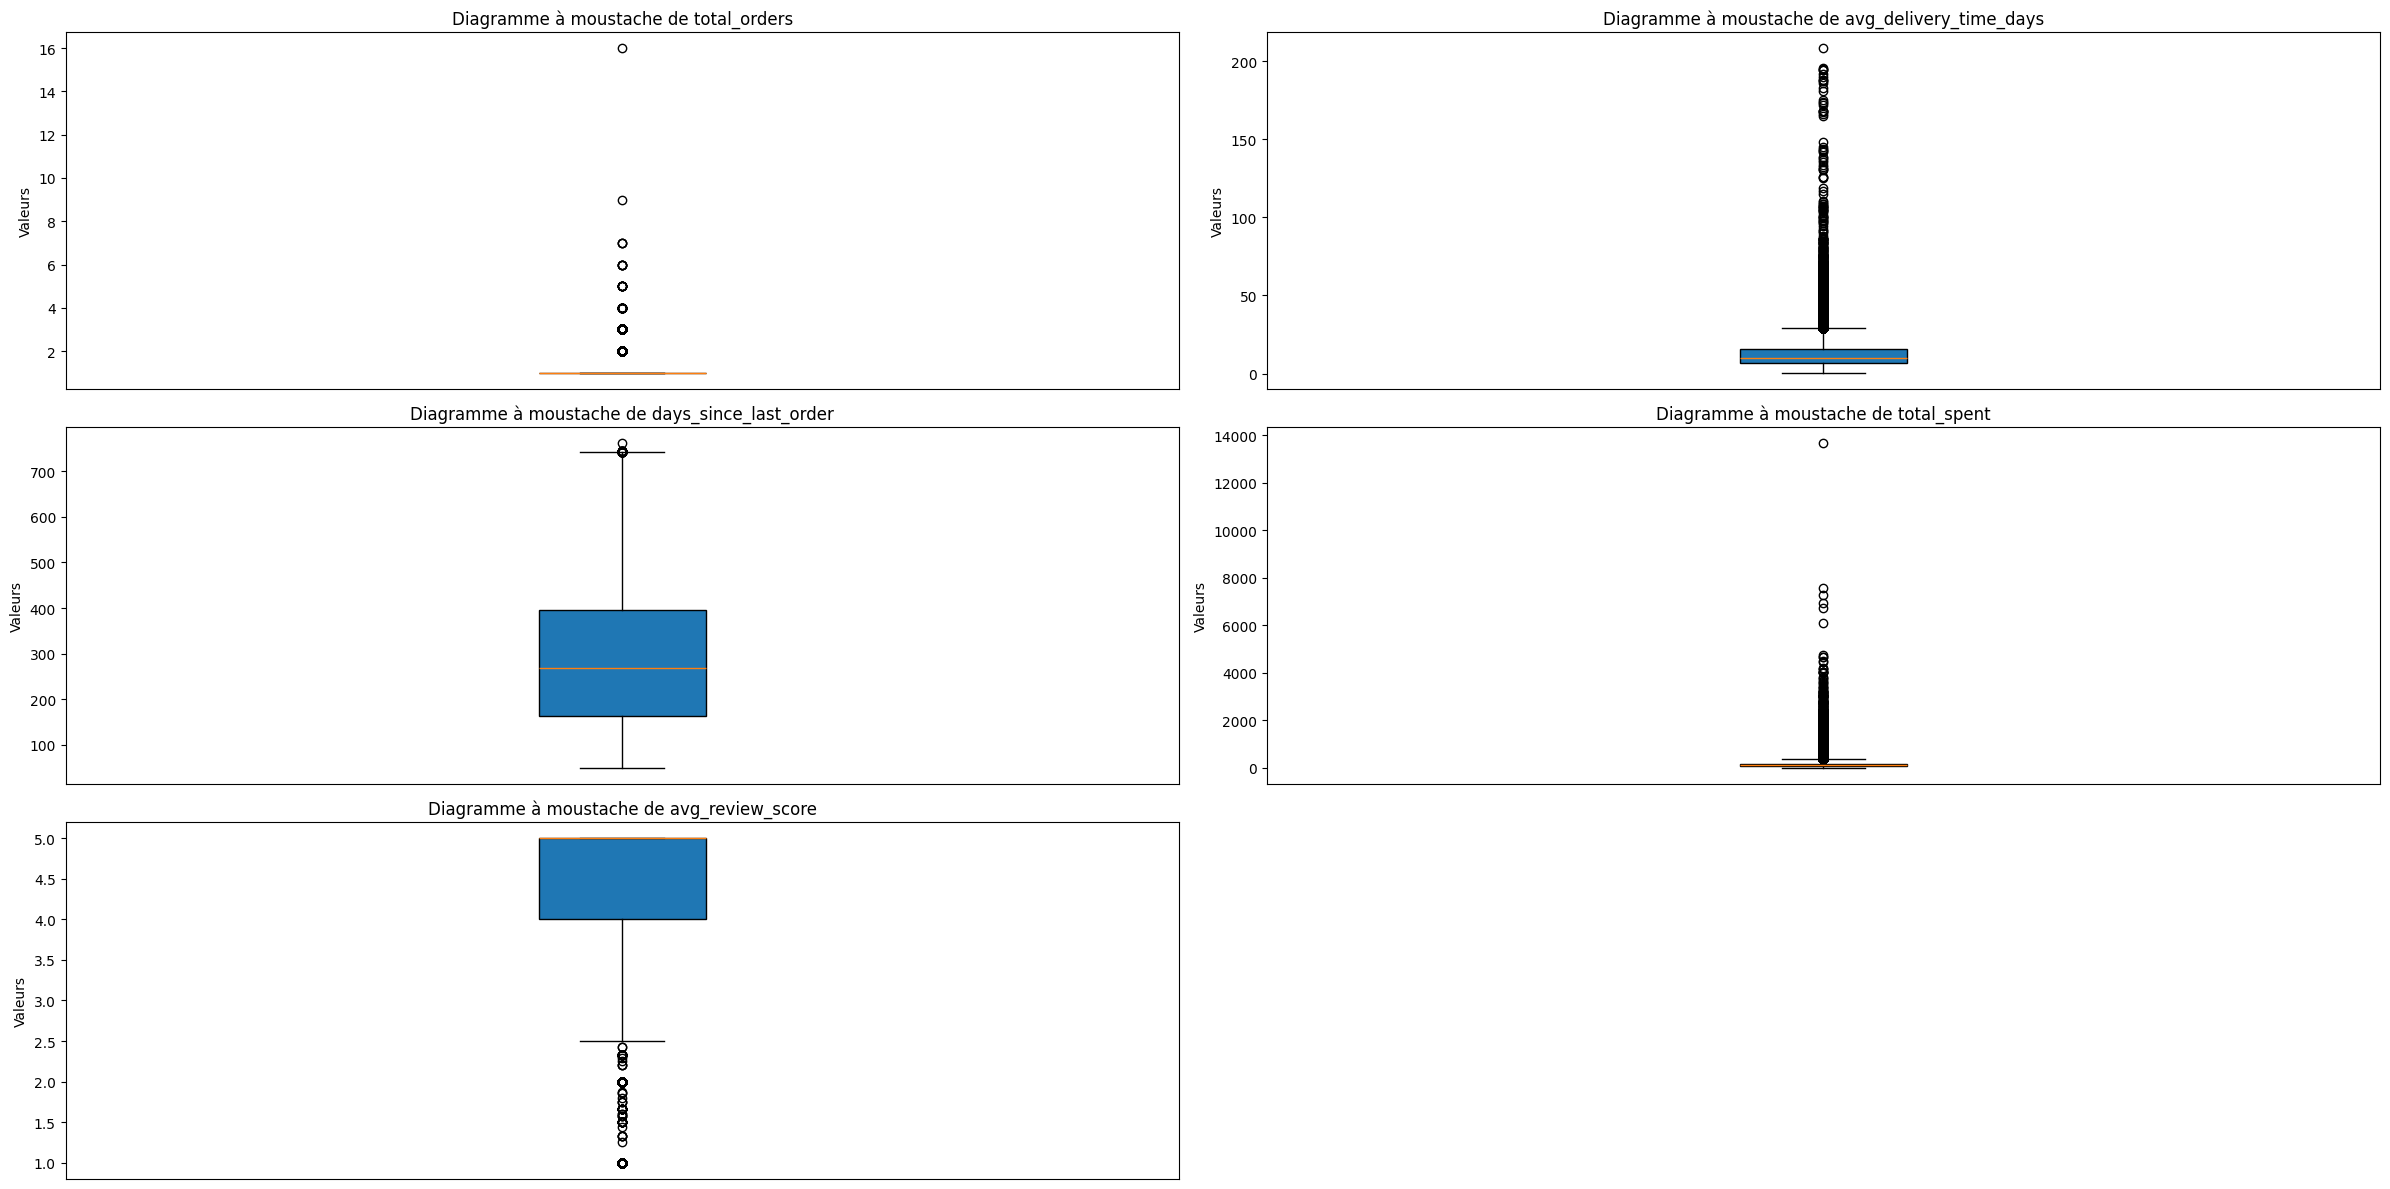

In [47]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


### Nous constatons que les valeurs des colonnes numériques sont bien réparties. Il n'y a pas de valeur aberrante ou incohérente.

In [48]:
# Créer un dataframe ne contenant que les colonnes de type number
df_num = df.select_dtypes(include=['number'])

In [49]:
correlation_matrix = df_num.corr()

# write correlation matrix to file
correlation_matrix.to_csv('data/correlation_matrix.csv')

print(correlation_matrix)

                        total_orders  avg_delivery_time_days  \
total_orders                1.000000               -0.005258   
avg_delivery_time_days     -0.005258                1.000000   
days_since_last_order      -0.021922                0.099317   
total_spent                 0.140618                0.068379   
avg_review_score            0.002330               -0.334964   

                        days_since_last_order  total_spent  avg_review_score  
total_orders                        -0.021922     0.140618          0.002330  
avg_delivery_time_days               0.099317     0.068379         -0.334964  
days_since_last_order                1.000000    -0.003194         -0.007983  
total_spent                         -0.003194     1.000000         -0.041918  
avg_review_score                    -0.007983    -0.041918          1.000000  


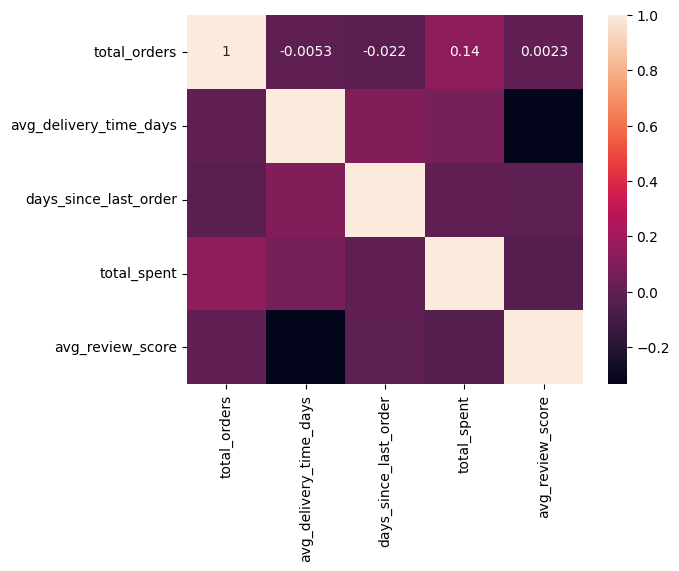

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Analyse des colonnes contenant des valeurs autres que des numbers

In [51]:
# create a dataframe with columns which are not number type
df_not_num = df.select_dtypes(exclude=['number'])

In [52]:
df_not_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92753 entries, 0 to 95419
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  92753 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [53]:
df_not_num.sample(5)

,customer_unique_id
10411,1bbefa71117fcbd8edee57bfb54f558e
51531,8a3bedb46246417ce3579406dde6d8da
60905,a343623dd03ba8fb128431669cb4ee28
32087,55db0f105e5ff30ad61bf0650c5c5338
74749,c84294553b4e6a8311a6ea57c8c596b1


### La colonne unique id servira a identifier le client après segmentation.

## Génération du fichier csv clean pour les modèles de machine learning.

In [54]:
# write the resulting dataframe to a csv file
df.to_csv('data/clean.csv', index=False)

In [55]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score
88000,ebdb8144ac33f6c6b94813eef593af7e,1,12.649641,523.803414,34.09,5.0
82955,de3310643e5dc5aeda6082c500dc629f,1,46.120984,327.158530,400.45,1.0
15430,295e9c54b2bf6eef2eaf468e80788bc4,1,26.473819,230.199896,165.80,1.0
55373,94a6a8ead5c42ee8c5e111f8e4aa5b78,1,7.115822,503.315787,123.01,4.0
40049,6b2a5ca1951e2192b2605cbf45b29892,1,3.113125,264.073090,51.34,4.0
22691,3cacfbd1c1e185f2798fcbe60b502fcb,1,11.764850,497.002014,137.08,3.0
94553,fdb2f8a871f180fefdf3ba06bf7ab179,2,12.731528,497.873935,408.58,5.0
71092,be74c431147c32ab2d7c7cef5e4a995f,1,10.919132,159.988877,1436.46,5.0
46169,7b9b082ceaa61d7bc565cdad86597669,1,12.051319,166.941944,1107.96,5.0
85775,e5e2fc979b6bfeffee571eba28b80c34,1,6.415995,516.251898,37.59,4.0
